# Team 7 Final Project

Data Importing and Pre-processing ---- DONE ----
- Clear description of dataset characteristics and import methods with complete execution of preprocessing steps with detailed explanations.
---- DONE
- Import dataset and describe characteristics such as dimensions, data types, file types, and import methods used
---- DONE
- Clean, wrangle, and handle missing data
---- DONE
- Transform data appropriately using techniques such as aggregation, normalization, and feature construction
---- NOT NECESSARY?
- Reduce redundant data and perform need based discretization
---- DONE

Data Analysis and Visualization ---- IN PROGRESS ----
- An in-depth implementation of descriptive analysis with explanation of findings and relationships between variables.
---- super super close to done
- Identify categorical, ordinal, and numerical variables within data
---- DONE
- Provide measures of centrality and distribution with visualizations
---- DONE
- Diagnose for correlations between variables and determine independent and dependent variables
---- DONE
- Perform exploratory analysis in combination with visualization techniques to discover patterns and features of interest
---- super super close to done

Data Analytics
- Appropriate model selection and implementation with clear explanation of results.
- Determine the need for a supervised or unsupervised learning method and identify dependent and independent variables
---- PENDING
- Train, test, and provide accuracy and evaluation metrics for model results
---- PENDING

Presentation
- In a 5 to 10 minutes video, briefly explain the project workflow from the code and results in your markdown notebook
- State your findings from the data and provide the interpretation of results from your analysis at each stage in the project

## 1. Data Importing and Pre-Processing

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from scipy.stats import mode
from sklearn.linear_model import LogisticRegression

### Importing CSV Dataset from E-Commerce

In [2]:
datasetFP = '../data/Dataset 3 (Online Shoppers Intention)/online_shoppers_intention.csv'
eCommerceDF = pd.read_csv(datasetFP) 

### Describing Data Shape

In [3]:
eCommerceDF.shape

(12330, 18)

### Taking a Peek at the Data

In [4]:
eCommerceDF.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0.0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1.0,1,1,1,Returning_Visitor,False,False
1,0,0.0,0.0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2.0,2,1,2,Returning_Visitor,False,False
2,0,0.0,0.0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4.0,1,9,3,Returning_Visitor,False,False
3,0,0.0,0.0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3.0,2,2,4,Returning_Visitor,False,False
4,0,0.0,0.0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3.0,3,1,4,Returning_Visitor,True,False


In [5]:
eCommerceDF.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12202.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12195.000000,12330.000000,12207.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503770,34.472398,31.731468,1194.746220,0.022191,0.043073,5.911196,0.061427,2.123618,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270882,140.749294,44.475503,1913.669288,0.048488,0.048597,18.632116,0.198917,0.911829,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


### Remove Duplicates

In [6]:
eCommerceDF = eCommerceDF.drop_duplicates()

In [7]:
eCommerceDF.shape #Re-running dimensions after removing duplicates

(12209, 18)

We lost 121 rows.

### Remove Nulls

In [8]:
eCommerceDF.isnull().sum() #Check number of nulls

Administrative               0
Administrative_Duration      0
Informational              128
Informational_Duration       0
ProductRelated               0
ProductRelated_Duration      0
BounceRates                  0
ExitRates                    0
PageValues                 135
SpecialDay                   0
Month                        0
OperatingSystems           123
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64

In [9]:
print(eCommerceDF.isnull().sum()/eCommerceDF.count()) #What percent of the data is null?

Administrative             0.000000
Administrative_Duration    0.000000
Informational              0.010595
Informational_Duration     0.000000
ProductRelated             0.000000
ProductRelated_Duration    0.000000
BounceRates                0.000000
ExitRates                  0.000000
PageValues                 0.011181
SpecialDay                 0.000000
Month                      0.000000
OperatingSystems           0.010177
Browser                    0.000000
Region                     0.000000
TrafficType                0.000000
VisitorType                0.000000
Weekend                    0.000000
Revenue                    0.000000
dtype: float64


All blanks make up less than 1% of the data if need to drop

#### Fill Null PageValues based on Revenue: If Page Values all = 0, then Revenue = FALSE

In [10]:
eCommerceDF.loc[eCommerceDF['PageValues'].isnull()&eCommerceDF['Revenue'].notnull()&eCommerceDF['Revenue'].eq(False),'PageValues'] = 0

#### Fill Null PageValues based on Revenue: If Page Values != 0, then Revenue = TRUE

In [11]:
eCommerceDF.loc[eCommerceDF['PageValues']!=0&eCommerceDF['Revenue'].eq(False),'Revenue'] = True

#### Fill Null Informational based on Informational_Duration: If Informational_Duration = 1, then Informational = 0

In [12]:
eCommerceDF.loc[eCommerceDF['Informational'].isnull()&eCommerceDF['Informational_Duration'].notnull()&eCommerceDF['Informational_Duration'].eq(0),'Informational'] = 0

#### Remove Null Informational where Duration > 0

In [13]:
eCommerceDF = eCommerceDF.dropna()
#Dropping all nulls regardless of column because we fixed the PageValue nulls and will drop the Operating System column

#### Checking Shape and Null Count

In [14]:
eCommerceDF.shape

(12043, 18)

In [15]:
eCommerceDF.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

We lost 166 rows

### Reduce Redundant Data
#### Drop all columns were discretized and do not have a key

It would be difficult to do analysis on these columns because we do not have the background information as to what their key means. For instance, Region = 23 means nothing without a key and, thus, we can not make contextual insights.

In [16]:
eCommerceDF = eCommerceDF.drop(columns=['Browser','Region','TrafficType', 'OperatingSystems'])

In [17]:
eCommerceDF.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'VisitorType', 'Weekend', 'Revenue'],
      dtype='object')

In [18]:
eCommerceDF.shape

(12043, 14)

### Update Data Types: Discretize/Recategorize

In [19]:
eCommerceDF.dtypes

Administrative               int64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

#### Updating Data Type for Informational to int 

In [20]:
eCommerceDF['Informational'] = eCommerceDF['Informational'].astype('int64')

This is to match the other page count column data types.

#### Making Visitor Type Boolean

In [21]:
newvisitor = {'New_Visitor': 1, 'Returning_Visitor': 0,
           'Other': 0}
 
eCommerceDF['NewVisitor'] = eCommerceDF['VisitorType'].map(newvisitor)

#Creates a column called New Visitor that is 1 if Visitor Type = New Visitor and 0 if otherwise.

In [22]:
returningvisitor = {'New_Visitor': 0, 'Returning_Visitor': 1,
           'Other': 0}
 
eCommerceDF['ReturnVisitor'] = eCommerceDF['VisitorType'].map(returningvisitor)

#Creates a column called Returning Visitor that is 1 if Visitor Type = Returning Visitor and 0 if otherwise.

#### Making Month Numerical

In [23]:
monthnum = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
 
eCommerceDF['MonthNum'] = eCommerceDF['Month'].map(monthnum)

#Creates a column called MonthNum that provides the number associated with that month

#### Making Page Visits Boolean

In [24]:
#Creates a column called [PAGETYPE]YN where we designate whether someone went to an [PAGETYPE] Page or not
#The value is 1 if someone went to at least 1 [PAGETYPE] page and 0 if otherwise

eCommerceDF["AdministrativeYN"]=np.where(eCommerceDF["Administrative"]>0,1,0)

In [25]:
eCommerceDF["InformationalYN"]=np.where(eCommerceDF["Informational"]>0,1,0)

In [26]:
eCommerceDF["ProductRelatedYN"]=np.where(eCommerceDF["ProductRelated"]>0,1,0)

#### Making Page Duration Discrete

In [27]:
#Creates a column called [PAGETYPE]_Duration_Cat where we designate whether
#someone spent a long time or a short/null amount of time on [PAGETYPE]
#The value is "Long Visit" if the person spent over or equal to the average amount of time on the page
#(average is based on average of duration for the page type, excluding people who did not visit that page type)
#and the value is "Short Visit" if the person spent less than the average amount of time on the page

eCommerceDF["Administrative_Duration_Cat"]=np.where(eCommerceDF["Administrative_Duration"]>=184,"Long Visit","Short/No Visit")

In [28]:
eCommerceDF["Informational_Duration_Cat"]=np.where(eCommerceDF["Informational_Duration"]>=190,"Long Visit","Short/No Visit")

In [29]:
eCommerceDF["ProductRelated_Duration_Cat"]=np.where(eCommerceDF["ProductRelated_Duration"]>=184,"Long Visit","Short/No Visit")

#### Making Bounce Rates Boolean

In [30]:
#Creates a column called BounceYN where we designate whether the page has a positive bounce rate or not

eCommerceDF["BounceYN"]=np.where(eCommerceDF["BounceRates"]>0,1,0)

#### Making Exit Rate Discrete

In [31]:
#Creates a column called Exit Rates where we designate a category describing the level of exit rate for that page
#The value is High Rate if the exit rate is over .1 and low otherwise

eCommerceDF["ExitLevel"]=np.where(eCommerceDF["ExitRates"]>.10,"High Rate","Low Rate")

## 2. Data Analysis and Visualization

In [32]:
eCommerceDF.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'VisitorType', 'Weekend', 'Revenue', 'NewVisitor', 'ReturnVisitor',
       'MonthNum', 'AdministrativeYN', 'InformationalYN', 'ProductRelatedYN',
       'Administrative_Duration_Cat', 'Informational_Duration_Cat',
       'ProductRelated_Duration_Cat', 'BounceYN', 'ExitLevel'],
      dtype='object')

### Identify Variable Types

In [33]:
eCommerceDF.dtypes

Administrative                   int64
Administrative_Duration        float64
Informational                    int64
Informational_Duration         float64
ProductRelated                   int64
ProductRelated_Duration        float64
BounceRates                    float64
ExitRates                      float64
PageValues                     float64
SpecialDay                     float64
Month                           object
VisitorType                     object
Weekend                           bool
Revenue                           bool
NewVisitor                       int64
ReturnVisitor                    int64
MonthNum                         int64
AdministrativeYN                 int64
InformationalYN                  int64
ProductRelatedYN                 int64
Administrative_Duration_Cat     object
Informational_Duration_Cat      object
ProductRelated_Duration_Cat     object
BounceYN                         int64
ExitLevel                       object
dtype: object

The number of pages someone visited of the various types are integer numbers - this makes sense because you can't visit 1.5 pages, you can only visit a whole number's worth of pages.

The various duration measures are float/decimal numbers.

Bounce Rates and Exit Rates are floats/decimal numbers.

Revenue is boolean- true/false - as to whether the person made a sale.

Month and Visitor Type are categorical variables, but we made a corresponding numerical column.

### Provide Measure of Centrality and Distribution with Visualizations

#### Administrative

In [34]:
print("Mean")
print(eCommerceDF['Administrative'].mean())
print("Median")
print(eCommerceDF['Administrative'].median())
print("Mode")
print(mode(eCommerceDF['Administrative']).mode[0])
print("Standard Deviation")
print(eCommerceDF['Administrative'].std())

Mean
2.323590467491489
Median
1.0
Mode
0
Standard Deviation
3.3158981984769365


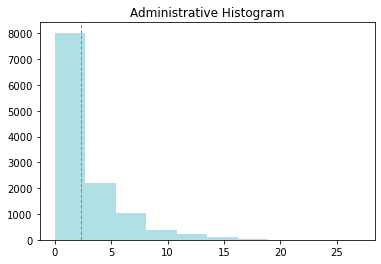

In [105]:
plt.hist(eCommerceDF['Administrative'], color = 'powderblue')
plt.axvline(eCommerceDF['Administrative'].mean(), color='cadetblue', linestyle='dashed', linewidth=1)
plt.title("Administrative Histogram")
plt.show() 

#Highly skewed

#### Administrative Duration

In [37]:
print("Mean")
print(eCommerceDF['Administrative_Duration'].mean())
print("Median")
print(eCommerceDF['Administrative_Duration'].median())
print("Mode")
print(mode(eCommerceDF['Administrative_Duration']).mode[0])
print("Standard Deviation")
print(eCommerceDF['Administrative_Duration'].std())

Mean
81.29879512057073
Median
9.0
Mode
0.0
Standard Deviation
176.4228603533695


In [107]:
#Gets actual average amount of time spent on page for those who visited the page

administrationyndf = eCommerceDF.groupby(['AdministrativeYN']).count()
administrationyndf = pd.DataFrame(administrationyndf['Revenue'])

admintimedf = eCommerceDF[eCommerceDF['Revenue']==1]
admintimedf = admintimedf.groupby(['AdministrativeYN']).mean()
admintimedf = pd.DataFrame(admintimedf['Administrative_Duration'])

mergeddf = pd.merge(administrationyndf,admintimedf, on='AdministrativeYN')
mergeddf = mergeddf.rename(columns={"Revenue": "#ofAdminVisitors", "Administrative_Duration": "AvgAdminDuration"})
print(mergeddf)

                  #ofAdminVisitors  AvgAdminDuration
AdministrativeYN                                    
0                             5593          0.000000
1                             6450        184.836437


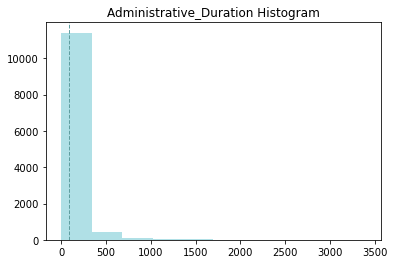

In [108]:
plt.hist(eCommerceDF['Administrative_Duration'], color = 'powderblue')
plt.axvline(eCommerceDF['Administrative_Duration'].mean(), color='cadetblue', linestyle='dashed', linewidth=1)
plt.title("Administrative_Duration Histogram")
plt.show() 

#Highly skewed, lots of variation

#### Informational

In [40]:
print("Mean")
print(eCommerceDF['Informational'].mean())
print("Median")
print(eCommerceDF['Informational'].median())
print("Mode")
print(mode(eCommerceDF['Informational']).mode[0])
print("Standard Deviation")
print(eCommerceDF['Informational'].std())

Mean
0.5017022336627086
Median
0.0
Mode
0
Standard Deviation
1.26804251924386


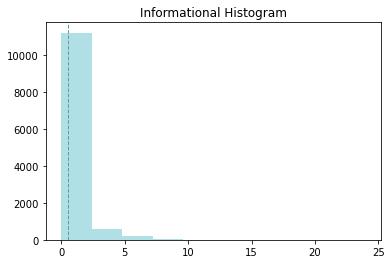

In [110]:
plt.hist(eCommerceDF['Informational'], color = 'powderblue')
plt.axvline(eCommerceDF['Informational'].mean(), color='cadetblue', linestyle='dashed', linewidth=1)
plt.title("Informational Histogram")
plt.show() 

#Highly skewed

#### Informational Duration

In [42]:
print("Mean")
print(eCommerceDF['Informational_Duration'].mean())
print("Median")
print(eCommerceDF['Informational_Duration'].median())
print("Mode")
print(mode(eCommerceDF['Informational_Duration']).mode[0])
print("Standard Deviation")
print(eCommerceDF['Informational_Duration'].std())

Mean
34.463102337354115
Median
0.0
Mode
0.0
Standard Deviation
141.24758172611592


In [112]:
#Gets actual average amount of time spent on page for those who visited the page

informationyndf = eCommerceDF.groupby(['InformationalYN']).count()
informationyndf = pd.DataFrame(informationyndf['Revenue'])

infotimedf = eCommerceDF[eCommerceDF['Revenue']==1]
infotimedf = infotimedf.groupby(['InformationalYN']).mean()
infotimedf = pd.DataFrame(infotimedf['Informational_Duration'])


mergeddf = pd.merge(informationyndf,infotimedf, on='InformationalYN')
mergeddf = mergeddf.rename(columns={"Revenue": "#ofInfoVisitors", "Informational_Duration":"AvgInfoDuration"})
print(mergeddf)

                 #ofInfoVisitors  AvgInfoDuration
InformationalYN                                  
0                           9477         0.000000
1                           2566       189.837875


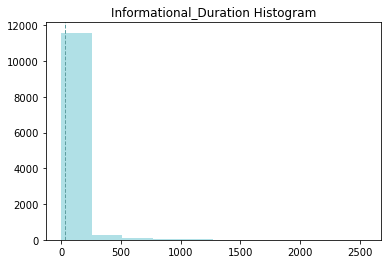

In [114]:
plt.hist(eCommerceDF['Informational_Duration'], color = 'powderblue')
plt.axvline(eCommerceDF['Informational_Duration'].mean(), color='cadetblue', linestyle='dashed', linewidth=1)
plt.title("Informational_Duration Histogram")
plt.show() 

#Highly skewed, lots of outliers

#### ProductRelated

In [45]:
print("Mean")
print(eCommerceDF['ProductRelated'].mean())
print("Median")
print(eCommerceDF['ProductRelated'].median())
print("Mode")
print(mode(eCommerceDF['ProductRelated']).mode[0])
print("Standard Deviation")
print(eCommerceDF['ProductRelated'].std())

Mean
31.873287386863737
Median
18.0
Mode
1
Standard Deviation
44.283890967432384


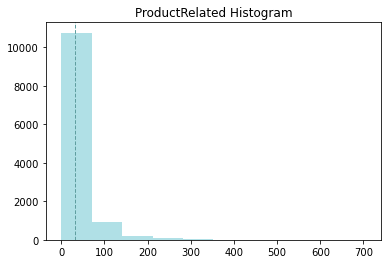

In [115]:
plt.hist(eCommerceDF['ProductRelated'], color = 'powderblue')
plt.axvline(eCommerceDF['ProductRelated'].mean(), color='cadetblue', linestyle='dashed', linewidth=1)
plt.title("ProductRelated Histogram")
plt.show() 

#Highly skewed, lots of outliers (more than that of the other pages)

#### ProductRelated Duration

In [47]:
print("Mean")
print(eCommerceDF['ProductRelated_Duration'].mean())
print("Median")
print(eCommerceDF['ProductRelated_Duration'].median())
print("Mode")
print(mode(eCommerceDF['ProductRelated_Duration']).mode[0])
print("Standard Deviation")
print(eCommerceDF['ProductRelated_Duration'].std())

Mean
1199.056284420416
Median
606.8333332999999
Mode
0.0
Standard Deviation
1904.7166410725174


In [116]:
#Gets actual average amount of time spent on page for those who visited the page

productyndf = eCommerceDF.groupby(['ProductRelatedYN']).count()
productyndf = pd.DataFrame(productyndf['Revenue'])

producttimedf = eCommerceDF[eCommerceDF['Revenue']==1]
producttimedf = producttimedf.groupby(['ProductRelatedYN']).mean()
producttimedf = pd.DataFrame(producttimedf['ProductRelated_Duration'])

mergeddf = pd.merge(productyndf,producttimedf, on='ProductRelatedYN')
mergeddf = mergeddf.rename(columns={"Revenue": "#ofProductVisitors", "ProductRelated_Duration": "AvgPRDuration"})
print(mergeddf)

                  #ofProductVisitors  AvgPRDuration
ProductRelatedYN                                   
0                                 38       0.000000
1                              12005    2131.841203


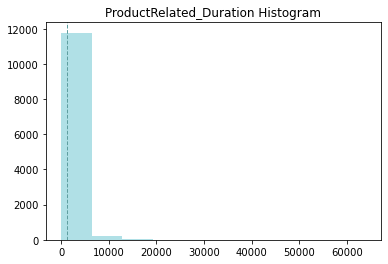

In [117]:
plt.hist(eCommerceDF['ProductRelated_Duration'], color = 'powderblue')
plt.axvline(eCommerceDF['ProductRelated_Duration'].mean(), color='cadetblue', linestyle='dashed', linewidth=1)
plt.title("ProductRelated_Duration Histogram")
plt.show() 

#Highly skewed, lots of outliers

#### Bounce Rates

In [50]:
print("Mean")
print(eCommerceDF['BounceRates'].mean())
print("Median")
print(eCommerceDF['BounceRates'].median())
print("Mode")
print(mode(eCommerceDF['BounceRates']).mode[0])
print("Standard Deviation")
print(eCommerceDF['BounceRates'].std())

Mean
0.020521232124885633
Median
0.0029411759999999
Mode
0.0
Standard Deviation
0.04547541412190938


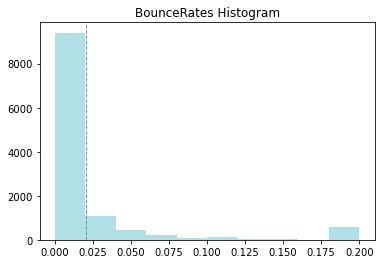

In [118]:
plt.hist(eCommerceDF['BounceRates'], color = 'powderblue')
plt.axvline(eCommerceDF['BounceRates'].mean(), color='cadetblue', linestyle='dashed', linewidth=1)
plt.title("BounceRates Histogram")
plt.show() 

#Highly skewed, lots of outliers, interesting peak near the high values

#### ExitRates

In [52]:
print("Mean")
print(eCommerceDF['ExitRates'].mean())
print("Median")
print(eCommerceDF['ExitRates'].median())
print("Mode")
print(mode(eCommerceDF['ExitRates']).mode[0])
print("Standard Deviation")
print(eCommerceDF['ExitRates'].std())

Mean
0.04165042325359046
Median
0.025
Mode
0.2
Standard Deviation
0.046346485572350486


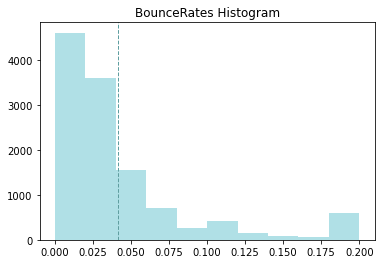

In [119]:
plt.hist(eCommerceDF['ExitRates'], color = 'powderblue')
plt.axvline(eCommerceDF['ExitRates'].mean(), color='cadetblue', linestyle='dashed', linewidth=1)
plt.title("BounceRates Histogram")
plt.show() 

#Highly skewed, interesting peak near the high values

#### PageValues

In [54]:
print("Mean")
print(eCommerceDF['PageValues'].mean())
print("Median")
print(eCommerceDF['PageValues'].median())
print("Mode")
print(mode(eCommerceDF['PageValues']).mode[0])
print("Standard Deviation")
print(eCommerceDF['PageValues'].std())

Mean
5.91777579789488
Median
0.0
Mode
0.0
Standard Deviation
18.68411493207842


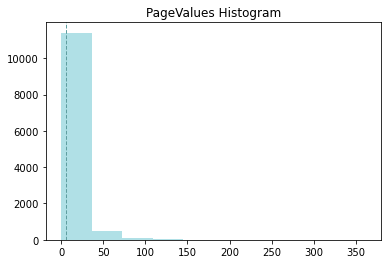

In [120]:
plt.hist(eCommerceDF['PageValues'], color = 'powderblue')
plt.axvline(eCommerceDF['PageValues'].mean(), color='cadetblue', linestyle='dashed', linewidth=1)
plt.title("PageValues Histogram")
plt.show() 

#Highly skewed, lots of outliers

#### SpecialDay

In [56]:
print("Mean")
print(eCommerceDF['SpecialDay'].mean())
print("Median")
print(eCommerceDF['SpecialDay'].median())
print("Mode")
print(mode(eCommerceDF['SpecialDay']).mode[0])
print("Standard Deviation")
print(eCommerceDF['SpecialDay'].std())

Mean
0.06202773395333397
Median
0.0
Mode
0.0
Standard Deviation
0.1997227115181979


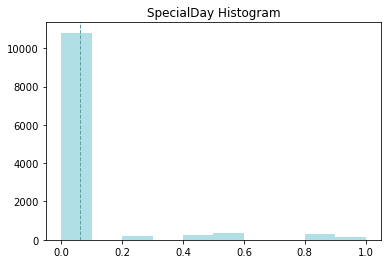

In [122]:
plt.hist(eCommerceDF['SpecialDay'], color = 'powderblue')
plt.axvline(eCommerceDF['SpecialDay'].mean(), color='cadetblue', linestyle='dashed', linewidth=1)
plt.title("SpecialDay Histogram")
plt.show() 

#Highly skewed, lots of variability

#### Month

In [58]:
print(mode(eCommerceDF['Month']).mode[0])

May


Text(0.5, 1.0, 'Count of Data by Month')

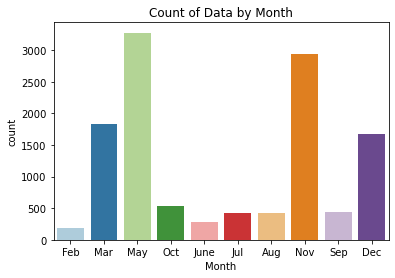

In [137]:
sns.countplot(x = eCommerceDF['Month'], palette = "Paired")
plt.title("Count of Data by Month")

#### Visitor Type

In [60]:
print(mode(eCommerceDF['VisitorType']).mode[0])

Returning_Visitor


Text(0.5, 1.0, 'Count of Data by VisitorType')

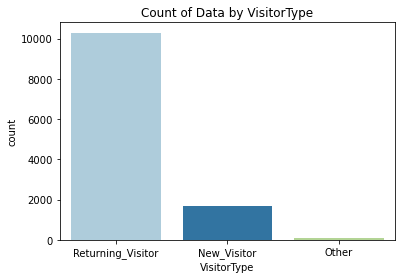

In [138]:
sns.countplot(x = eCommerceDF['VisitorType'], palette = "Paired")
plt.title("Count of Data by VisitorType")

#### Weekend

In [62]:
print(mode(eCommerceDF['Weekend']).mode[0])

False


Text(0.5, 1.0, 'Count of Data by Weekend')

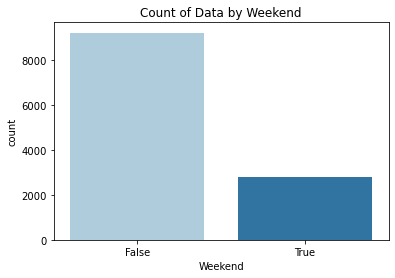

In [139]:
sns.countplot(x = eCommerceDF['Weekend'], palette = "Paired")
plt.title("Count of Data by Weekend")

### Diagonse Correlation

#### Dependent variable of choice for project is revenue

Other possible dependent variables of choice were duration, bounce rate, and exit rates.

In [64]:
eCommerceDF.groupby(by = "Revenue").mean()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,NewVisitor,ReturnVisitor,MonthNum,AdministrativeYN,InformationalYN,ProductRelatedYN,BounceYN
Revenue,,,,,,,,,,,,,,,,,,
False,1.667147,58.941388,0.339173,21.686058,24.004435,887.719047,0.025365,0.048690,0.000000,0.072092,0.227741,0.133718,0.859297,7.430203,0.446724,0.156337,0.996452,0.543963
True,4.281415,147.979171,0.986442,72.570299,55.341931,2127.611360,0.006074,0.020655,23.567386,0.032011,0.252646,0.153439,0.840608,8.365079,0.800595,0.382275,0.998016,0.561177


In [65]:
eCommerceDF.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Revenue,NewVisitor,ReturnVisitor,MonthNum,AdministrativeYN,InformationalYN,ProductRelatedYN,BounceYN
Administrative,1.000000,0.601203,0.373173,0.251457,0.426870,0.369415,-0.213506,-0.311713,0.099097,-0.097446,0.023668,0.341903,0.026275,-0.021270,0.095783,0.652558,0.364542,0.023798,0.079372
Administrative_Duration,0.601203,1.000000,0.301980,0.236340,0.279669,0.347195,-0.137479,-0.202653,0.067773,-0.074948,0.014627,0.218863,0.023707,-0.021566,0.057569,0.429131,0.254967,0.018816,0.047795
Informational,0.373173,0.301980,1.000000,0.620687,0.369688,0.383457,-0.108488,-0.158395,0.048749,-0.048913,0.032669,0.221363,-0.056058,0.059724,0.060993,0.254341,0.760392,0.008249,0.147412
Informational_Duration,0.251457,0.236340,0.620687,1.000000,0.276270,0.344733,-0.069669,-0.102376,0.030638,-0.031880,0.023744,0.156227,-0.044073,0.046209,0.042529,0.161075,0.468920,0.012795,0.101412
ProductRelated,0.426870,0.279669,0.369688,0.276270,1.000000,0.858140,-0.193986,-0.287401,0.056011,-0.024809,0.014001,0.306882,-0.125039,0.130709,0.153865,0.287171,0.339668,0.040496,0.245901
ProductRelated_Duration,0.369415,0.347195,0.383457,0.344733,0.858140,1.000000,-0.174974,-0.246562,0.051989,-0.037504,0.005412,0.282297,-0.118960,0.122648,0.135664,0.252383,0.327089,0.035419,0.221489
BounceRates,-0.213506,-0.137479,-0.108488,-0.069669,-0.193986,-0.174974,1.000000,0.902344,-0.115557,0.089155,-0.034854,-0.183960,-0.136368,0.129480,-0.055615,-0.304043,-0.138024,-0.096055,0.409613
ExitRates,-0.311713,-0.202653,-0.158395,-0.102376,-0.287401,-0.246562,0.902344,1.000000,-0.173475,0.117770,-0.053257,-0.262320,-0.182819,0.173086,-0.087733,-0.420826,-0.197024,-0.104154,0.326866
PageValues,0.099097,0.067773,0.048749,0.030638,0.056011,0.051989,-0.115557,-0.173475,1.000000,-0.066231,0.010334,0.547006,0.104004,-0.115421,0.065684,0.125787,0.057751,0.017820,-0.111155
SpecialDay,-0.097446,-0.074948,-0.048913,-0.031880,-0.024809,-0.037504,0.089155,0.117770,-0.066231,1.000000,-0.018653,-0.087031,-0.084918,0.089183,-0.260142,-0.125115,-0.048701,0.004130,0.100781


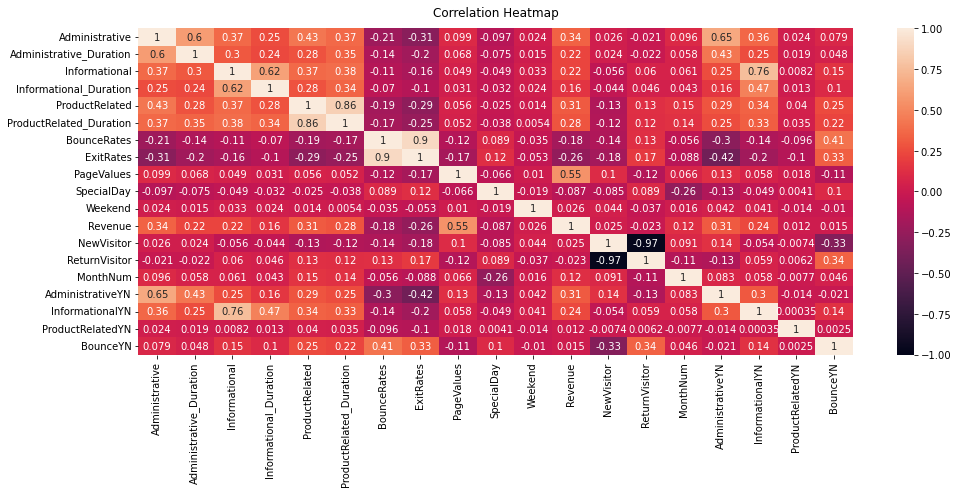

In [134]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(eCommerceDF.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

#Things with good correlation (.5+), ignoring converted columns
#Administrative and Administrative Duration
#Informational and Informational Duration
#Product Related and Product Related Duration
#Bounce Rates and Exit Rates
#Page Values and Revenue

#### Page Types and Revenue

Compare total number of people who went to a [PAGETYPE] to number who went to a [PAGETYPE] and spent money

In [135]:
administrationyndf = eCommerceDF.groupby(['AdministrativeYN']).count()
administrationyndf = pd.DataFrame(administrationyndf['Revenue'])

revenuedf = eCommerceDF[eCommerceDF['Revenue']==1]
revenuedf = revenuedf.groupby(['AdministrativeYN']).count()
revenuedf = pd.DataFrame(revenuedf['Revenue'])

mergeddf = pd.merge(administrationyndf,revenuedf, on='AdministrativeYN')
mergeddf = mergeddf.rename(columns={"Revenue_x": "#ofAdminVisitors", "Revenue_y": "#ofAdminSpenders"})
mergeddf['Revenue %'] = mergeddf['#ofAdminSpenders']/mergeddf['#ofAdminVisitors']*100
print(mergeddf)

                  #ofAdminVisitors  #ofAdminSpenders  Revenue %
AdministrativeYN                                               
0                             5593               603  10.781334
1                             6450              2421  37.534884


In [68]:
#Create Dataframe of Counts of People who Went to an Informational Page
informationyndf = eCommerceDF.groupby(['InformationalYN']).count()
informationyndf = pd.DataFrame(informationyndf['Revenue'])

#Create Dataframe of Counts of People who Went to an Informational Page and Spent Money
revenuedf = eCommerceDF[eCommerceDF['Revenue']==1]
revenuedf = revenuedf.groupby(['InformationalYN']).count()
revenuedf = pd.DataFrame(revenuedf['Revenue'])

#Merge Data Frames and Get Percent of People who Went to an Informational Page and Spent Money
mergeddf = pd.merge(informationyndf,revenuedf, on='InformationalYN')
mergeddf = mergeddf.rename(columns={"Revenue_x": "#ofInfoVisitors", "Revenue_y": "#ofInfoSpenders"})
mergeddf['Revenue %'] = mergeddf['#ofInfoSpenders']/mergeddf['#ofInfoVisitors']*100
print(mergeddf)

                 #ofInfoVisitors  #ofInfoSpenders  Revenue %
InformationalYN                                             
0                           9477             1868  19.710879
1                           2566             1156  45.050663


In [69]:
#########INSERT VISUALIZATION

In [70]:
#Create Dataframe of Counts of People who Went to a Product Related Page
productyndf = eCommerceDF.groupby(['ProductRelatedYN']).count()
productyndf = pd.DataFrame(productyndf['Revenue'])

#Create Dataframe of Counts of People who Went to a Product Related and Spent Money
revenuedf = eCommerceDF[eCommerceDF['Revenue']==1]
revenuedf = revenuedf.groupby(['ProductRelatedYN']).count()
revenuedf = pd.DataFrame(revenuedf['Revenue'])

#Merge Data Frames and Get Percent of People who Went to a Product Related Page and Spent Money
mergeddf = pd.merge(productyndf,revenuedf, on='ProductRelatedYN')
mergeddf = mergeddf.rename(columns={"Revenue_x": "#ofProductVisitors", "Revenue_y": "#ofProductSpenders"})
mergeddf['Revenue %'] = mergeddf['#ofProductSpenders']/mergeddf['#ofProductVisitors']*100
print(mergeddf)

                  #ofProductVisitors  #ofProductSpenders  Revenue %
ProductRelatedYN                                                   
0                                 38                   6  15.789474
1                              12005                3018  25.139525


In [71]:
#########INSERT VISUALIZATION

In [72]:
#########INSIGHT

#Those who go to pages buy things.
#Only 6 people who went to product related pages did not buy something.

#### Page Durations and Revenue

In [73]:
adminvisitors = eCommerceDF[eCommerceDF['Administrative']>1]
adminddf = adminvisitors.groupby(['Administrative_Duration_Cat']).count()
adminddf = pd.DataFrame(adminddf['Revenue'])
#print(adminddf)

revenuedf = adminvisitors[adminvisitors['Revenue']==1]
revenuedf = revenuedf.groupby(['Administrative_Duration_Cat']).count()
revenuedf = pd.DataFrame(revenuedf['Revenue'])
#print(revenuedf)

mergeddf = pd.merge(adminddf,revenuedf, on='Administrative_Duration_Cat')
mergeddf = mergeddf.rename(columns={"Revenue_x": "TotalVisitors", "Revenue_y": "Spenders"})
mergeddf['Revenue %'] = mergeddf['Spenders']/mergeddf['TotalVisitors']*100
print(mergeddf)

                             TotalVisitors  Spenders  Revenue %
Administrative_Duration_Cat                                    
Long Visit                            1528       766   50.13089
Short/No Visit                        3588      1250   34.83835


In [74]:
#########INSERT VISUALIZATION

In [75]:
infovisitors = eCommerceDF[eCommerceDF['Informational']>1]
infoddf = infovisitors.groupby(['Informational_Duration_Cat']).count()
infoddf = pd.DataFrame(infoddf['Revenue'])
#print(infoddf)

revenuedf = infovisitors[infovisitors['Revenue']==1]
revenuedf = revenuedf.groupby(['Informational_Duration_Cat']).count()
revenuedf = pd.DataFrame(revenuedf['Revenue'])
#print(revenuedf)

mergeddf = pd.merge(infoddf,revenuedf, on='Informational_Duration_Cat')
mergeddf = mergeddf.rename(columns={"Revenue_x": "TotalVisitors", "Revenue_y": "Spenders"})
mergeddf['Revenue %'] = mergeddf['Spenders']/mergeddf['TotalVisitors']*100
print(mergeddf)

                            TotalVisitors  Spenders  Revenue %
Informational_Duration_Cat                                    
Long Visit                            532       314  59.022556
Short/No Visit                       1010       426  42.178218


In [76]:
#########INSERT VISUALIZATION

In [77]:
productvisitors = eCommerceDF[eCommerceDF['ProductRelated']>1]
productddf = productvisitors.groupby(['ProductRelated_Duration_Cat']).count()
productddf = pd.DataFrame(productddf['Revenue'])
#print(productddf)

revenuedf = productvisitors[productvisitors['Revenue']==1]
revenuedf = revenuedf.groupby(['ProductRelated_Duration_Cat']).count()
revenuedf = pd.DataFrame(revenuedf['Revenue'])
#print(revenuedf)

mergeddf = pd.merge(productddf,revenuedf, on='ProductRelated_Duration_Cat')
mergeddf = mergeddf.rename(columns={"Revenue_x": "TotalVisitors", "Revenue_y": "Spenders"})
mergeddf['Revenue %'] = mergeddf['Spenders']/mergeddf['TotalVisitors']*100
print(mergeddf)

                             TotalVisitors  Spenders  Revenue %
ProductRelated_Duration_Cat                                    
Long Visit                            9099      2871  31.552918
Short/No Visit                        2406       135   5.610973


In [78]:
#########INSERT VISUALIZATION

In [79]:
#########INSIGHT

#Those who spend more than the average amount of time on a page are more likely to buy

#### Bounce Rates and Revenue

In [80]:
bouncedf = eCommerceDF.groupby(['BounceYN']).count()
bouncedf = pd.DataFrame(bouncedf['Revenue'])
#print(bouncedf)

revenuedf = eCommerceDF[eCommerceDF['Revenue']==1]
revenuedf = revenuedf.groupby(['BounceYN']).count()
revenuedf = pd.DataFrame(revenuedf['Revenue'])
#print(revenuedf)

mergeddf = pd.merge(bouncedf,revenuedf, on='BounceYN')
mergeddf = mergeddf.rename(columns={"Revenue_x": "TotalBounces", "Revenue_y": "Revenue"})
mergeddf['Revenue %'] = mergeddf['Revenue']/mergeddf['TotalBounces']*100
print(mergeddf)

          TotalBounces  Revenue  Revenue %
BounceYN                                  
0                 5440     1327  24.393382
1                 6603     1697  25.700439


In [81]:
#########INSERT VISUALIZATION

In [82]:
#########INSIGHT

#Interesting - pages that cause no bounces have very similar revenue rates to those with bounces

#### Exit Rates and Revenue

In [83]:
exitldf = eCommerceDF.groupby(['ExitLevel']).count()
exitldf = pd.DataFrame(exitldf['Revenue'])
#print(exitldf)

revenuedf = eCommerceDF[eCommerceDF['Revenue']==1]
revenuedf = revenuedf.groupby(['ExitLevel']).count()
revenuedf = pd.DataFrame(revenuedf['Revenue'])
#print(revenuedf)

mergeddf = pd.merge(exitldf,revenuedf, on='ExitLevel')
mergeddf = mergeddf.rename(columns={"Revenue_x": "TotalExits", "Revenue_y": "Revenue"})
mergeddf['Revenue %'] = mergeddf['Revenue']/mergeddf['TotalExits']*100
print(mergeddf)

           TotalExits  Revenue  Revenue %
ExitLevel                                
High Rate         983        6   0.610376
Low Rate        11060     3018  27.287523


In [84]:
#########INSIGHT

#Those who go to high exit rate pages do not buy things

#### Page Values and Revenue

In [85]:
#########QUESTION/HOLD UP

#I am confused by page value - some visits have page value even though they don't have transactions
#and page value's metric should be based on whether or not a transaction occurred

#### Month and Revenue

In [86]:
eCommerceDF.groupby(by = ["Month","Revenue"]).mean()

Administrative  Administrative_Duration  Informational  \
Month Revenue                                                           
Aug   False          2.656667                77.800624       0.456667   
      True           4.362205               178.905500       0.771654   
Dec   False          1.756860                64.622288       0.406250   
      True           3.853659               134.223614       0.867209   
Feb   False          0.377143                 9.192048       0.074286   
      True           5.666667               249.319445       0.500000   
Jul   False          1.650327                59.613577       0.346405   
      True           4.250000               109.493077       0.916667   
June  False          1.520179                34.395230       0.408072   
      True           5.016949               146.308166       1.101695   
Mar   False          1.489046                55.190901       0.278995   
      True           4.190972               165.350445       1.197917   
May   False          1.339202                49.539857       0.268388   
      True           4.206086               143.028633       0.980636   
Nov   False          1.658787                58.749190       0.405447   
      True           4.449449               153.385050       1.091091   
Oct   False          3.337079               115.110302       0.382022   
      True           4.607735               151.743577       0.723757   
Sep   False          2.982935                96.798306       0.460751   
      True           3.973684               133.186525       0.736842   

               Informational_Duration  ProductRelated  \
Month Revenue                                           
Aug   False                 26.246333       29.693333   
      True                  59.085197       59.228346   
Dec   False                 28.581142       23.631860   
      True                  69.488566       44.303523   
Feb   False                  1.822857       10.571429   
      True                  20.000000       34.166667   
Jul   False                 27.608170       27.833333   
      True                  89.101806       54.475000   
June  False                 16.672571       27.825112   
      True                  31.549266       68.271186   
Mar   False                 20.837400       16.612113   
      True                  87.800543       39.541667   
May   False                 15.163563       20.672926   
      True                  69.422960       47.991701   
Nov   False                 28.697411       32.307297   
      True                  71.910678       72.239239   
Oct   False                 17.639442       29.362360   
      True                  82.555254       42.740331   
Sep   False                 15.380887       27.529010   
      True                  74.823916       44.243421   

               ProductRelated_Duration  BounceRates  ExitRates  PageValues  \
Month Revenue                                                                
Aug   False                 971.502762     0.023248   0.045580    0.000000   
      True                 2015.240448     0.006279   0.019377   19.418265   
Dec   False                 929.073320     0.021784   0.045066    0.000000   
      True                 1796.452217     0.004581   0.019419   31.242365   
Feb   False                 451.513972     0.045686   0.073737    0.000000   
      True                 1275.291667     0.009471   0.023224   27.304457   
Jul   False                 883.608001     0.031140   0.053452    0.000000   
      True                 1903.480050     0.009113   0.025706   14.684871   
June  False                 911.694312     0.040538   0.065623    0.000000   
      True                 2362.866365     0.007386   0.024909   16.554824   
Mar   False                 670.404739     0.020103   0.045478    0.000000   
      True                 1686.927938     0.003756   0.017226   25.783715   
May   False                 735.019722     0.030701   0.05518

Text(0, 0.5, 'Frequency of Purchase')

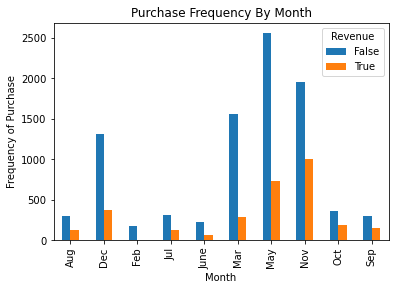

In [87]:
%matplotlib inline
pd.crosstab(eCommerceDF.Month,eCommerceDF.Revenue).plot(kind='bar')
plt.title('Purchase Frequency By Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')

In [88]:
#########INSIGHT

#Month is a predictor of revenue
#November yields a higher chance of purchase
#Visulaize Special Day Revenue Count for month of November could be interesting

#### Visitor Type and Revenue

In [89]:
eCommerceDF.groupby(by="VisitorType").count()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,ReturnVisitor,MonthNum,AdministrativeYN,InformationalYN,ProductRelatedYN,Administrative_Duration_Cat,Informational_Duration_Cat,ProductRelated_Duration_Cat,BounceYN,ExitLevel
VisitorType,,,,,,,,,,,,,,,,,,,,,
New_Visitor,1670,1670,1670,1670,1670,1670,1670,1670,1670,1670,...,1670,1670,1670,1670,1670,1670,1670,1670,1670,1670
Other,81,81,81,81,81,81,81,81,81,81,...,81,81,81,81,81,81,81,81,81,81
Returning_Visitor,10292,10292,10292,10292,10292,10292,10292,10292,10292,10292,...,10292,10292,10292,10292,10292,10292,10292,10292,10292,10292


In [90]:
eCommerceDF.groupby(by=["VisitorType","Revenue"]).count()

Administrative  Administrative_Duration  \
VisitorType       Revenue                                            
New_Visitor       False              1206                     1206   
                  True                464                      464   
Other             False                63                       63   
                  True                 18                       18   
Returning_Visitor False              7750                     7750   
                  True               2542                     2542   

                           Informational  Informational_Duration  \
VisitorType       Revenue                                          
New_Visitor       False             1206                    1206   
                  True               464                     464   
Other             False               63                      63   
                  True                18                      18   
Returning_Visitor False             7750                    7750   
                  True              2542                    2542   

                           ProductRelated  ProductRelated_Duration  \
VisitorType       Revenue                                            
New_Visitor       False              1206                     1206   
                  True                464                      464   
Other             False                63                       63   
                  True                 18                       18   
Returning_Visitor False              7750                     7750   
                  True               2542                     2542   

                           BounceRates  ExitRates  PageValues  SpecialDay  \
VisitorType       Revenue                                                   
New_Visitor       False           1206       1206        1206        1206   
                  True             464        464         464         464   
Other             False             63         63          63          63   
                  True              18         18          18          18   
Returning_Visitor False           7750       7750        7750        7750   
                  True            2542       2542        2542        2542   

                           ...  ReturnVisitor  MonthNum  AdministrativeYN  \
VisitorType       Revenue  ...                                              
New_Visitor       False    ...           1206      1206              1206   
                  True     ...            464       464               464   
Other             False    ...             63        63                63   
                  True     ...             18        18                18   
Returning_Visitor False    ...           7750      7750              7750   
                  True     ...           2542      2542              2542   

                           InformationalYN  ProductRelatedYN  \
VisitorType       Revenue                                      
New_Visitor       False               1206              1206   
                  True                 464               464   
Other             False                 63                63   
                  True                  18                18   
Returning_Visitor False               7750              7750   
                  True                2542              2542   

                           Administrative_Duration_Cat  \
VisitorType       Revenue                                
New_Visitor       False                           1206   
                  True                             464   
Other             False                             63   
                  True                              18   
Returning_Visitor False                           7750   
                  True                            2542   

                           Informational_Duration_Cat  \
VisitorType       Revenue                               
New_Visitor       False           

Text(0, 0.5, 'Frequency of Purchase')

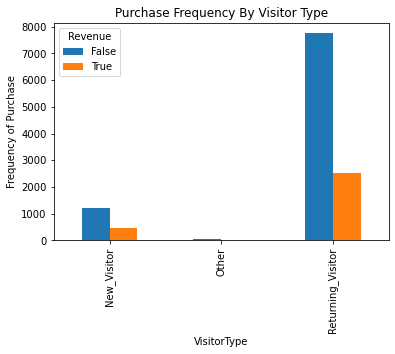

In [91]:
%matplotlib inline
pd.crosstab(eCommerceDF.VisitorType,eCommerceDF.Revenue).plot(kind='bar')
plt.title('Purchase Frequency By Visitor Type')
plt.xlabel('VisitorType')
plt.ylabel('Frequency of Purchase')

In [92]:
visitordf = eCommerceDF.groupby(['VisitorType']).count()
visitordf = pd.DataFrame(visitordf['Revenue'])
#print(visitordf)

revenuedf = eCommerceDF[eCommerceDF['Revenue']==1]
revenuedf = revenuedf.groupby(['VisitorType']).count()
revenuedf = pd.DataFrame(revenuedf['Revenue'])
#print(revenuedf)

mergeddf = pd.merge(visitordf,revenuedf, on='VisitorType')
mergeddf = mergeddf.rename(columns={"Revenue_x": "TotalVisitors", "Revenue_y": "Revenue"})
mergeddf['Revenue %'] = mergeddf['Revenue']/mergeddf['TotalVisitors']*100
print(mergeddf)

                   TotalVisitors  Revenue  Revenue %
VisitorType                                         
New_Visitor                 1670      464  27.784431
Other                         81       18  22.222222
Returning_Visitor          10292     2542  24.698795


In [93]:
#########INSIGHT

#No significant impact from visitor type

#### Weekend and Revenue

Text(0, 0.5, 'Frequency of Purchase')

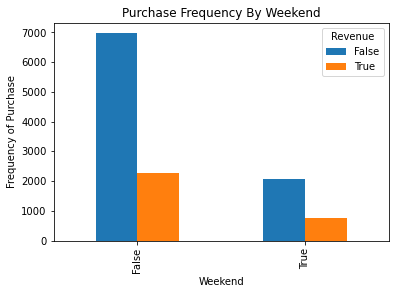

In [94]:
%matplotlib inline
pd.crosstab(eCommerceDF.Weekend,eCommerceDF.Revenue).plot(kind='bar')
plt.title('Purchase Frequency By Weekend')
plt.xlabel('Weekend')
plt.ylabel('Frequency of Purchase')



In [95]:
weekenddf = eCommerceDF.groupby(['Weekend']).count()
weekenddf = pd.DataFrame(weekenddf['Revenue'])
#print(visitordf)

revenuedf = eCommerceDF[eCommerceDF['Revenue']==1]
revenuedf = revenuedf.groupby(['Weekend']).count()
revenuedf = pd.DataFrame(revenuedf['Revenue'])
#print(revenuedf)

mergeddf = pd.merge(weekenddf,revenuedf, on='Weekend')
mergeddf = mergeddf.rename(columns={"Revenue_x": "WeekendCount", "Revenue_y": "Revenue"})
mergeddf['Revenue %'] = mergeddf['Revenue']/mergeddf['WeekendCount']*100
print(mergeddf)

         WeekendCount  Revenue  Revenue %
Weekend                                  
False            9225     2260  24.498645
True             2818      764  27.111427


In [96]:
#########INSIGHT

#No significant impact from weekend 

## Data Analytics